</div>
$$
\text{Proiect RBMMA}
$$

# EM -- Mixturi gausiene
Stim (din curs) ca \begin{align*}\alpha_1^{(s)}&=\frac{1}{N}\sum_{i=1}^N\pi_{\theta^{(s-1)}}(1\vert y_i)\\&=\frac1N\sum_{i=1}^N\frac{\alpha_1^{(s-1)}\mathcal{N}\left(y_i;m_1^{(s-1)},\sigma_1^{2,(s-1)}\right)}{\alpha_1^{(s-1)}\mathcal{N}\left(y_i;m_1^{(s-1)},\sigma_1^{2,(s-1)}\right)+\alpha_2^{(s-1)}\mathcal{N}\left(y_i;m_2^{(s-1)},\sigma_2^{2,(s-1)}\right)}\end{align*} si \begin{align*}\alpha_2^{(s)}&=\frac1N\sum_{i=1}^N\pi_{\theta^{(s-1)}}(2\vert y_i)\\&=\frac1N\sum_{i=1}^N\frac{\alpha_2^{(s-1)}\mathcal{N}\left(y_i;m_2^{(s-1)},\sigma_2^{2,(s-1)}\right)}{\alpha_1^{(s-1)}\mathcal{N}\left(y_i;m_1^{(s-1)},\sigma_1^{2,(s-1)}\right)+\alpha_2^{(s-1)}\mathcal{N}\left(y_i;m_2^{(s-1)},\sigma_2^{2,(s-1)}\right)}.\end{align*}
Avem \begin{align*}
    H(m_1',m_2',\sigma_1',\sigma_2')&=\sum\limits_{i=1}^N\left(\mathrm{log}\mathcal{N}(y_i;m_1',\sigma_1')\cdot\pi_{\theta}(1\vert y_i)+\mathrm{log}\mathcal{N}(y_i;m_2',\sigma_2')\cdot\pi_{\theta}(2\vert y_i)\right)\\
    &=\sum_{i=1}^N\left(\log \frac{1}{\sqrt{2\pi}\sigma_1'}-\frac{(y_i-m_1')^2}{2\sigma_1'^2}\right)\cdot\pi_{\theta}(1\vert y_i)+\left(\log \frac{1}{\sqrt{2\pi}\sigma_2'}-\frac{(y_i-m_2')^2}{2\sigma_2'^2}\right)\cdot\pi_{\theta}(2\vert y_i).
\end{align*}
Atunci, $$\frac{\partial H}{\partial m_1'}=\frac{1}{\sigma_1'}\sum_{i=1}^N(y_i-m_1')\pi_{\theta}(1\vert y_i)=0\iff m_1'\sum_{i=1}^N\pi_{\theta}(1\vert y_i)=\sum_{i=1}^Ny_i\pi_{\theta}(1\vert y_i),$$de unde $$m_1^{(s)}=\frac{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(1\vert y_i)y_i}{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(1\vert y_i)}$$si analog, $$m_2^{(s)}=\frac{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(2\vert y_i)y_i}{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(2\vert y_i)}.$$In cele din urma, avem $$\frac{\partial H}{\partial \sigma_1'^2}=\sum_{i=1}^N\left(-\frac{1}{2\sigma_1'^2}+\frac{(y_i-m_1')^2}{2\sigma_1'^4}\right)\pi_{\theta}(1\vert y_i)=0\iff\sigma_1'^2\sum_{i=1}^N\pi_{\theta}(1\vert y_i)=\sum_{i=1}^N(y_i-m_1')^2\pi_{\theta}(1\vert y_i),$$de unde $${\sigma_1^{2}}^{(s)}=\frac{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(1\vert y_i)\left(y_i-m_1^{(s-1)}\right)^2}{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(1\vert y_i)}$$si analog, $${\sigma_2^{2}}^{(s)}=\frac{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(2\vert y_i)\left(y_i-m_2^{(s-1)}\right)^2}{\sum\limits_{i=1}^N\pi_{\theta^{(s-1)}}(2\vert y_i)}.$$

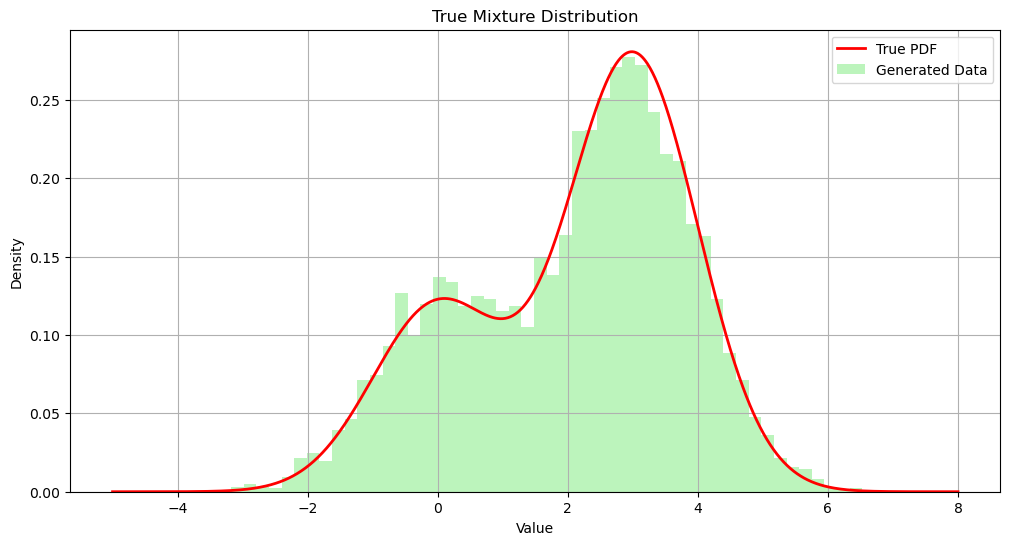

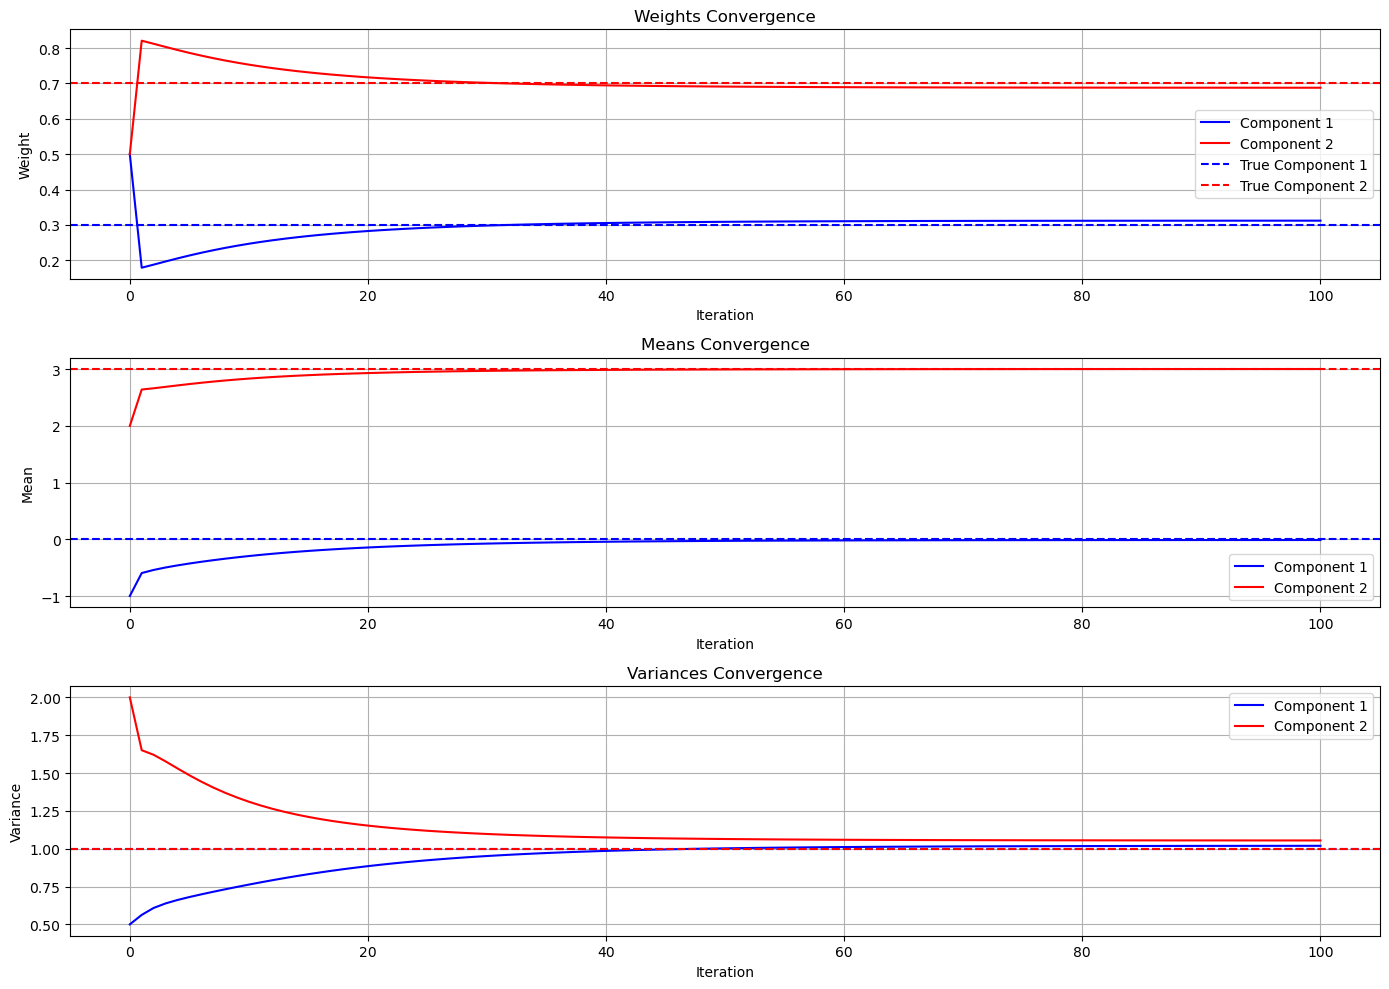

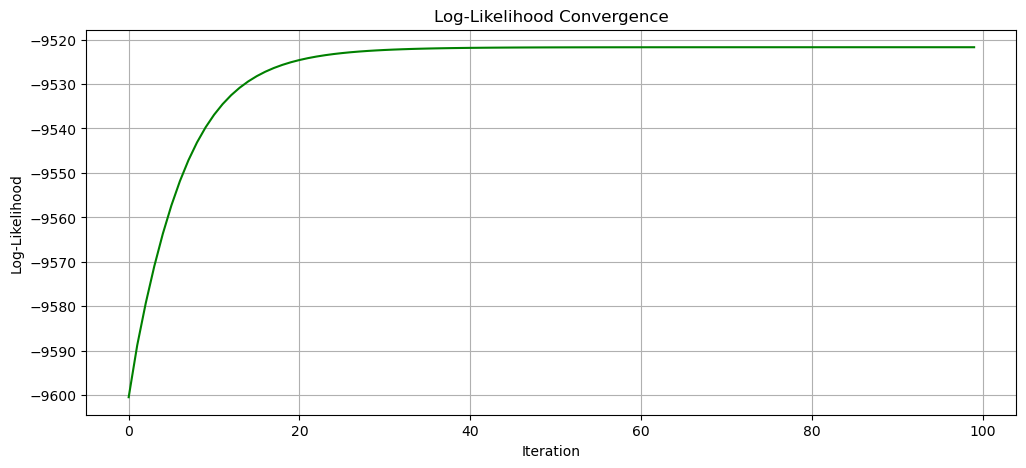

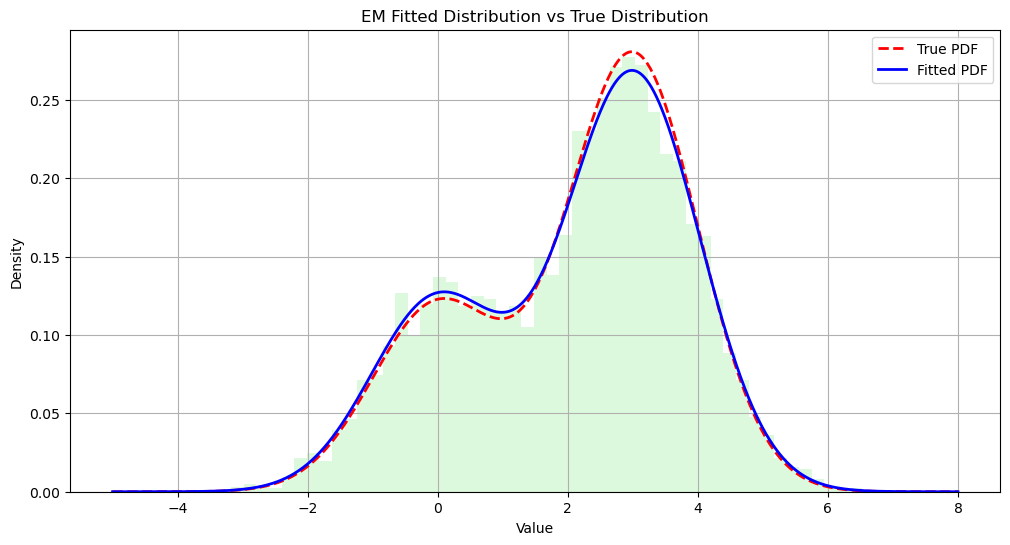

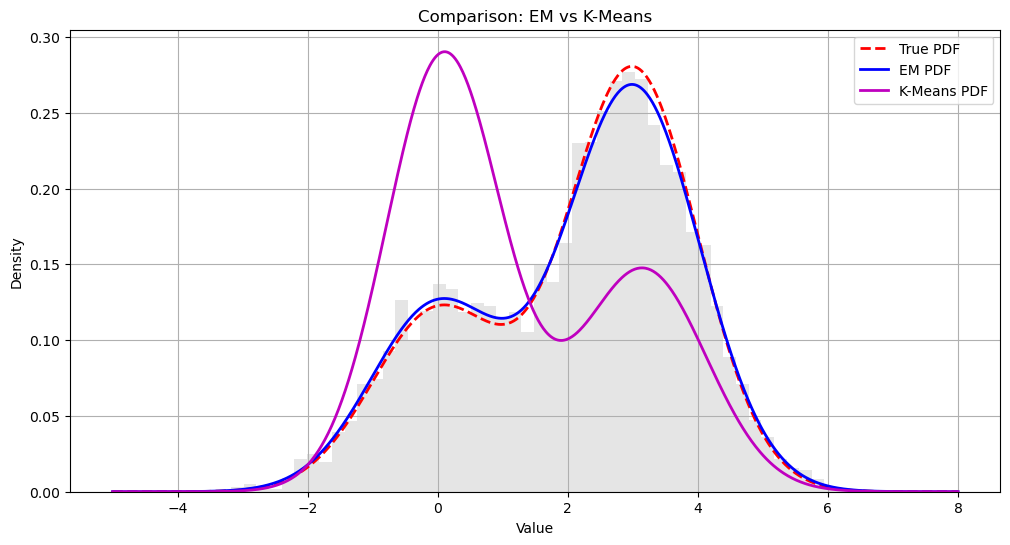

EM Results:
Estimated weights: [0.3120884 0.6879116]
Estimated means: [-0.0118779   3.00427206]
Estimated variances: [1.01895407 1.054412  ]
Converged in 100 iterations

K-Means Results:
Cluster proportions: [0.6436, 0.3564]
Cluster centers: [0.09780228 3.15975986]
Cluster stds: [0.8875761510279403, 0.9679404551825208]

Silhouette Scores:
EM: 0.6311
K-Means: 0.6313


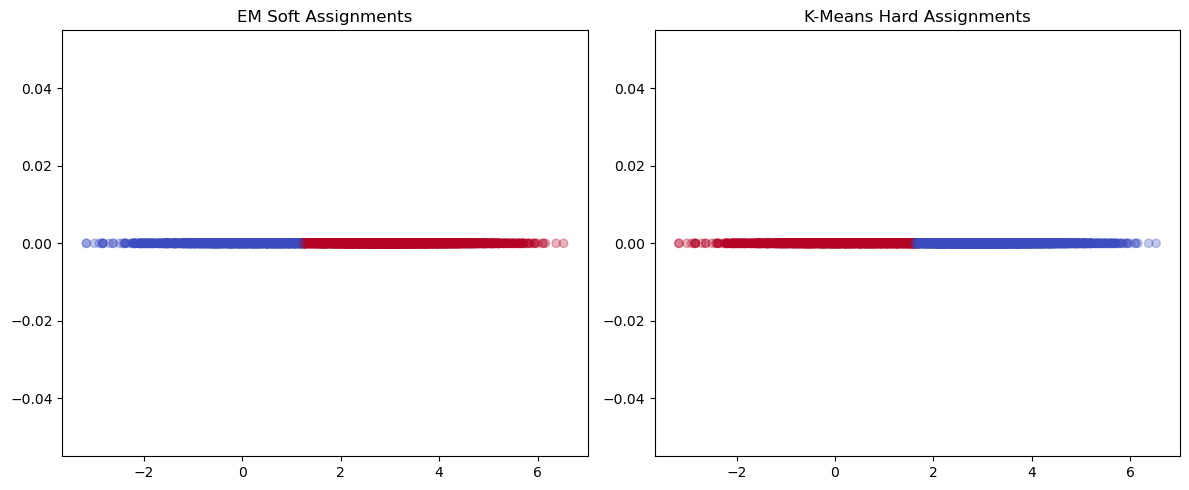

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate data function
def gen_mixture(dists, probs, N):
    """Generate mixture distribution samples"""
    choices = np.random.choice(len(dists), size=N, p=probs)
    X = np.zeros(N)
    for i, dist in enumerate(dists):
        mask = (choices == i)
        X[mask] = dist(np.sum(mask))
    return X

# Define distributions
dist1 = lambda n: np.random.normal(0, 1, n)  # N(0,1)
dist2 = lambda n: np.random.normal(3, 1, n)  # N(3,1)

# Parameters
true_weights = [0.3, 0.7]
true_means = [0, 3]
true_variances = [1, 1]
dists = [dist1, dist2]
N = 5000  # Sample size

# Generate data
X = gen_mixture(dists, true_weights, N)

# Plot true distribution
plt.figure(figsize=(12, 6))
plt.hist(X, bins=50, density=True, alpha=0.6, color='lightgreen')
x_range = np.linspace(-5, 8, 1000)
true_pdf = true_weights[0]*norm.pdf(x_range, true_means[0], np.sqrt(true_variances[0])) + \
           true_weights[1]*norm.pdf(x_range, true_means[1], np.sqrt(true_variances[1]))
plt.plot(x_range, true_pdf, 'r-', lw=2)
plt.title('True Mixture Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['True PDF', 'Generated Data'])
plt.grid(True)
plt.show()

# EM Algorithm Implementation
K = 2  # Number of components

# Initialize parameters (purposely different from true values)
weights = np.array([0.5, 0.5])
means = np.array([-1.0, 2.0])  # Poor initialization to show convergence
variances = np.array([0.5, 2.0])  # Poor initialization

# Store history for visualization
history = {
    'weights': [weights.copy()],
    'means': [means.copy()],
    'variances': [variances.copy()],
    'log_likelihood': []
}

# EM Algorithm
max_iter = 100
tolerance = 1e-6
prev_log_likelihood = -np.inf

for iteration in range(max_iter):
    # Expectation step
    responsibilities = np.zeros((K, N))
    for k in range(K):
        responsibilities[k, :] = weights[k] * norm.pdf(X, means[k], np.sqrt(variances[k]))
    responsibilities /= np.sum(responsibilities, axis=0)  # Normalize
    
    # Maximization step
    Nk = np.sum(responsibilities, axis=1)
    weights = Nk / N
    for k in range(K):
        means[k] = np.sum(responsibilities[k, :] * X) / Nk[k]
        variances[k] = np.sum(responsibilities[k, :] * (X - means[k])**2) / Nk[k]
    
    # Store current parameters
    history['weights'].append(weights.copy())
    history['means'].append(means.copy())
    history['variances'].append(variances.copy())
    
    # Calculate log-likelihood
    current_log_likelihood = np.sum(np.log(
        weights[0]*norm.pdf(X, means[0], np.sqrt(variances[0])) +
        weights[1]*norm.pdf(X, means[1], np.sqrt(variances[1]))))
    history['log_likelihood'].append(current_log_likelihood)
    
    # Check convergence
    if np.abs(current_log_likelihood - prev_log_likelihood) < tolerance:
        break
    prev_log_likelihood = current_log_likelihood

# Plot convergence diagnostics
plt.figure(figsize=(14, 10))

# Weights convergence
plt.subplot(3, 1, 1)
plt.plot([w[0] for w in history['weights']], 'b-', label='Component 1')
plt.plot([w[1] for w in history['weights']], 'r-', label='Component 2')
plt.axhline(true_weights[0], color='b', linestyle='--', label='True Component 1')
plt.axhline(true_weights[1], color='r', linestyle='--', label='True Component 2')
plt.title('Weights Convergence')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)

# Means convergence
plt.subplot(3, 1, 2)
plt.plot([m[0] for m in history['means']], 'b-', label='Component 1')
plt.plot([m[1] for m in history['means']], 'r-', label='Component 2')
plt.axhline(true_means[0], color='b', linestyle='--')
plt.axhline(true_means[1], color='r', linestyle='--')
plt.title('Means Convergence')
plt.xlabel('Iteration')
plt.ylabel('Mean')
plt.legend()
plt.grid(True)

# Variances convergence
plt.subplot(3, 1, 3)
plt.plot([v[0] for v in history['variances']], 'b-', label='Component 1')
plt.plot([v[1] for v in history['variances']], 'r-', label='Component 2')
plt.axhline(true_variances[0], color='b', linestyle='--')
plt.axhline(true_variances[1], color='r', linestyle='--')
plt.title('Variances Convergence')
plt.xlabel('Iteration')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot log-likelihood
plt.figure(figsize=(12, 5))
plt.plot(history['log_likelihood'], 'g-')
plt.title('Log-Likelihood Convergence')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

# Plot final fitted distribution
plt.figure(figsize=(12, 6))
plt.hist(X, bins=50, density=True, alpha=0.3, color='lightgreen')
x_range = np.linspace(-5, 8, 1000)
fitted_pdf = weights[0]*norm.pdf(x_range, means[0], np.sqrt(variances[0])) + \
             weights[1]*norm.pdf(x_range, means[1], np.sqrt(variances[1]))
plt.plot(x_range, true_pdf, 'r--', lw=2, label='True PDF')
plt.plot(x_range, fitted_pdf, 'b-', lw=2, label='Fitted PDF')
plt.title('EM Fitted Distribution vs True Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Compare with K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X.reshape(-1, 1))
kmeans_means = np.sort(kmeans.cluster_centers_.flatten())
kmeans_labels = kmeans.labels_

# Calculate K-Means PDF approximation
kmeans_pdf = np.zeros_like(x_range)
for i in range(2):
    cluster_data = X[kmeans_labels == i]
    if len(cluster_data) > 1:
        kmeans_pdf += (len(cluster_data)/len(X)) * \
                     norm.pdf(x_range, kmeans_means[i], np.std(cluster_data))

# Plot comparison
plt.figure(figsize=(12, 6))
plt.hist(X, bins=50, density=True, alpha=0.2, color='gray')
plt.plot(x_range, true_pdf, 'r--', lw=2, label='True PDF')
plt.plot(x_range, fitted_pdf, 'b-', lw=2, label='EM PDF')
plt.plot(x_range, kmeans_pdf, 'm-', lw=2, label='K-Means PDF')
plt.title('Comparison: EM vs K-Means')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("EM Results:")
print(f"Estimated weights: {weights}")
print(f"Estimated means: {means}")
print(f"Estimated variances: {variances}")
print(f"Converged in {len(history['log_likelihood'])} iterations")

print("\nK-Means Results:")
print(f"Cluster proportions: {[np.mean(kmeans_labels == 0), np.mean(kmeans_labels == 1)]}")
print(f"Cluster centers: {kmeans_means}")
print(f"Cluster stds: {[np.std(X[kmeans_labels == 0]), np.std(X[kmeans_labels == 1])]}")

# Calculate silhouette scores
em_labels = np.argmax(responsibilities, axis=0)
print("\nSilhouette Scores:")
print(f"EM: {silhouette_score(X.reshape(-1, 1), em_labels):.4f}")
print(f"K-Means: {silhouette_score(X.reshape(-1, 1), kmeans_labels):.4f}")

# Plot cluster assignments
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, np.zeros_like(X), c=em_labels, cmap='coolwarm', alpha=0.3)
plt.title('EM Soft Assignments')
plt.subplot(1, 2, 2)
plt.scatter(X, np.zeros_like(X), c=kmeans_labels, cmap='coolwarm', alpha=0.3)
plt.title('K-Means Hard Assignments')
plt.tight_layout()
plt.show()